# Reviews

In [1]:
pwd

'/mnt/c/edu'

In [3]:
import pandas as pd

fdir = '/mnt/c/edu/py_data/'
df1 = pd.read_csv(fdir + '관광정보.csv', index_col=0)
df1.head()

,축제명,주소,연락처,시작일,종료일,위도,경도
0,가락몰 페스티벌 2019,서울특별시 송파구 양재대로 932,02-3435-1000,2019-10-11,2019-10-12,37.496093,127.110983
1,가리왕산 MUSIC FESTIVAL 2020,강원도 정선군 북평면 중봉길 41-35,033-560-3016,2020-08-21,2020-08-22,37.474254,128.609754
2,가야문화축제 2020,경상남도 김해시 가야의길 126,055-330-3958,2020-10-29,2020-11-01,35.236069,128.873100
3,"가을 밀양강 오딧세이 ""아리랑 환타지! 밀양!"" 2019",경상남도 밀양시 중앙로 324 영남루 및 밀양강 야외 공연장 일대,055-359-4527,2019-10-18,2019-10-19,35.492135,128.755259
4,가을 화담숲 단풍 축제 2019,경기도 광주시 도척면 도척윗로 278,031-8026-6666,2019-10-12,2019-11-10,37.337484,127.292224


In [14]:
import folium

center = [36.51268355312979, 127.89514172930014]
m = folium.Map(location=center, zoom_start=7)

start = input('시작일 입력(예: 2020-01-01): ')
end = input('종료일 입력(예: 2020-01-01): ')
loc = input('지역명 입력(예: 서울, 송파, 강원도 등): ')

df2 = df1[(df1['시작일']>=start) & (df1['종료일']<=end)]
df2 = df2[df2['주소'].str.contains(loc)]

for i, r in df2.iterrows():
    folium.Marker(location=[r[5], r[6]],
                 popup=r[0],
                 icon=folium.Icon(color='blue')).add_to(m)

m.save(fdir + start + '~' + end + '_' + loc + '.html')
print('-------- done ---------')

시작일 입력(예: 2020-01-01): 2020-01-01
종료일 입력(예: 2020-01-01): 2020-03-01
지역명 입력(예: 서울, 송파, 강원도 등): 서울
-------- done ---------


# Open API 연결
1. 공공데이터 포털에 회원가입
2. 원하는 정보에 대한 키 생성 (키: 1인당 1개)
3. 정보에 대한 사용 승인 요청

- `pip install bs4`

In [17]:
import requests
from bs4 import BeautifulSoup as bs

In [28]:
with open(fdir + 'openapi/key.txt') as f:
    key = f.read()
print(key[:10])

zrwN1EZPDr


In [29]:
# key = 'OiT%2FeDvfciQhc3K40GC1Z8IdVE5IVzdf5qqpl52xiV5%2F%2FyeDPIfj5WRLrl8UoCEXc4Ro0xz1qaypj5Ai4xmsbQ%3D%3D'

num_rows = '10'
# start_day = input('시작일(예: 20200101) :')
# end_day = input('종료일(예: 20200101) :')
start_day = '20210101'
end_day = '20211231'

url1 = 'http://api.visitkorea.or.kr/openapi/service/rest/KorService/searchFestival?serviceKey=' + key 
url2 = '&numOfRows=' + num_rows + '&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&listYN=Y' + '&eventStartDate=' + start_day + '&eventEndDate=' + end_day
url = url1 + url2

print(url)

http://api.visitkorea.or.kr/openapi/service/rest/KorService/searchFestival?serviceKey=zrwN1EZPDresnEODmQCFdkJiD52oniVUvH4XlfJ%2FwVs3dJVo%2F%2FaoSabrmXOXFNz6VDcI2dQHcIvMMlxPJMPMyQ%3D%3D&numOfRows=10&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&listYN=Y&eventStartDate=20210101&eventEndDate=20211231


In [31]:
xml = requests.get(url)
xml

<Response [200]>

In [37]:
xml.content[:1000]  # 글자가 깨져서 출력

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>0000</resultCode><resultMsg>OK</resultMsg></header><body><items><item><addr1>\xea\xb2\xbd\xec\x83\x81\xeb\x82\xa8\xeb\x8f\x84 \xea\xb1\xb0\xec\xb0\xbd\xea\xb5\xb0 \xea\xb1\xb0\xec\xb0\xbd\xec\x9d\x8d \xec\xa4\x91\xec\x95\x99\xeb\xa1\x9c 103</addr1><areacode>36</areacode><cat1>A02</cat1><cat2>A0207</cat2><cat3>A02070200</cat3><contentid>1866255</contentid><contenttypeid>15</contenttypeid><createdtime>20131203110702</createdtime><eventenddate>20210214</eventenddate><eventstartdate>20201213</eventstartdate><firstimage>http://tong.visitkorea.or.kr/cms/resource/31/2694131_image2_1.jpg</firstimage><firstimage2>http://tong.visitkorea.or.kr/cms/resource/31/2694131_image2_1.jpg</firstimage2><mapx>127.9095393091</mapx><mapy>35.6866949586</mapy><mlevel>6</mlevel><modifiedtime>20201208153115</modifiedtime><readcount>22057</readcount><sigungucode>2</sigungucode><tel>070-8809-9182</tel><title>\xea\xb1\xb0\xec\xb0\

In [43]:
soup = bs(xml.content, features = 'html.parser')
soup

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>0000</resultcode><resultmsg>OK</resultmsg></header><body><items><item><addr1>경상남도 거창군 거창읍 중앙로 103</addr1><areacode>36</areacode><cat1>A02</cat1><cat2>A0207</cat2><cat3>A02070200</cat3><contentid>1866255</contentid><contenttypeid>15</contenttypeid><createdtime>20131203110702</createdtime><eventenddate>20210214</eventenddate><eventstartdate>20201213</eventstartdate><firstimage>http://tong.visitkorea.or.kr/cms/resource/31/2694131_image2_1.jpg</firstimage><firstimage2>http://tong.visitkorea.or.kr/cms/resource/31/2694131_image2_1.jpg</firstimage2><mapx>127.9095393091</mapx><mapy>35.6866949586</mapy><mlevel>6</mlevel><modifiedtime>20201208153115</modifiedtime><readcount>22057</readcount><sigungucode>2</sigungucode><tel>070-8809-9182</tel><title>거창 크리스마스트리문화축제 2021</title></item><item><addr1>충청남도 공주시 고마나루길 90</addr1><addr2>(웅진동)</addr2><areacode>34</areacode><cat1>A02</cat1><cat2>A0207</cat2><cat3>A02070200</

In [46]:
soup.find('totalcount')   # 태그 선택

<totalcount>55</totalcount>

In [50]:
num_rows2 = soup.find('totalcount').text  # 텍스트만 출력
num_rows2

'55'

In [51]:
#전체 데이터 개수로 재설정하여 실행

start_day = '20210101'
end_day = '20211231'

url1 = 'http://api.visitkorea.or.kr/openapi/service/rest/KorService/searchFestival?serviceKey=' + key 
url2 = '&numOfRows=' + num_rows2 + '&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&listYN=Y' + '&eventStartDate=' + start_day + '&eventEndDate=' + end_day
url = url1 + url2

print(url)

http://api.visitkorea.or.kr/openapi/service/rest/KorService/searchFestival?serviceKey=zrwN1EZPDresnEODmQCFdkJiD52oniVUvH4XlfJ%2FwVs3dJVo%2F%2FaoSabrmXOXFNz6VDcI2dQHcIvMMlxPJMPMyQ%3D%3D&numOfRows=55&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&listYN=Y&eventStartDate=20210101&eventEndDate=20211231


In [55]:
xml = requests.get(url)
soup = bs(xml.content, 'html.parser')
ls_data = soup.find_all('item')

print(len(ls_data))
print(ls_data[0])

55
<item><addr1>경상남도 거창군 거창읍 중앙로 103</addr1><areacode>36</areacode><cat1>A02</cat1><cat2>A0207</cat2><cat3>A02070200</cat3><contentid>1866255</contentid><contenttypeid>15</contenttypeid><createdtime>20131203110702</createdtime><eventenddate>20210214</eventenddate><eventstartdate>20201213</eventstartdate><firstimage>http://tong.visitkorea.or.kr/cms/resource/31/2694131_image2_1.jpg</firstimage><firstimage2>http://tong.visitkorea.or.kr/cms/resource/31/2694131_image2_1.jpg</firstimage2><mapx>127.9095393091</mapx><mapy>35.6866949586</mapy><mlevel>6</mlevel><modifiedtime>20201208153115</modifiedtime><readcount>22057</readcount><sigungucode>2</sigungucode><tel>070-8809-9182</tel><title>거창 크리스마스트리문화축제 2021</title></item>


In [61]:
print(ls_data[0].find_all('addr1'))         # 모든 값이 리스트로 들어감
print(ls_data[0].find('addr1'))             # 첫번째 검색 값을 반환
print(ls_data[0].find('addr1').text)        # 텍스트만 출력
print(ls_data[0].find('addr1').get_text())  # 텍스트만 출력

[<addr1>경상남도 거창군 거창읍 중앙로 103</addr1>]
<addr1>경상남도 거창군 거창읍 중앙로 103</addr1>
경상남도 거창군 거창읍 중앙로 103
경상남도 거창군 거창읍 중앙로 103


- 특정 태그를 리스트에 저장

In [64]:
ls_title = []
for data in ls_data:
    ls_title.append(data.find('title').text)
    
ls_title[:10]

['거창 크리스마스트리문화축제 2021',
 '겨울공주 군밤축제 2021',
 '경남고성공룡세계엑스포 2021',
 '계룡세계군문화엑스포 2021',
 '고니골빛축제 2020',
 '고양가을꽃축제 2021',
 '고양국제꽃박람회 2021',
 '광주비엔날레 2021',
 "남이섬 '사물 채집'展 2020",
 "남이섬 '한스 크리스티안 안데르센상 도서전 : 책과 어린이를 하나로' 2021"]

In [65]:
title = [data.find('title').text for data in ls_data]

title[:10]

['거창 크리스마스트리문화축제 2021',
 '겨울공주 군밤축제 2021',
 '경남고성공룡세계엑스포 2021',
 '계룡세계군문화엑스포 2021',
 '고니골빛축제 2020',
 '고양가을꽃축제 2021',
 '고양국제꽃박람회 2021',
 '광주비엔날레 2021',
 "남이섬 '사물 채집'展 2020",
 "남이섬 '한스 크리스티안 안데르센상 도서전 : 책과 어린이를 하나로' 2021"]

In [71]:
ls_data[0]

<item><addr1>경상남도 거창군 거창읍 중앙로 103</addr1><areacode>36</areacode><cat1>A02</cat1><cat2>A0207</cat2><cat3>A02070200</cat3><contentid>1866255</contentid><contenttypeid>15</contenttypeid><createdtime>20131203110702</createdtime><eventenddate>20210214</eventenddate><eventstartdate>20201213</eventstartdate><firstimage>http://tong.visitkorea.or.kr/cms/resource/31/2694131_image2_1.jpg</firstimage><firstimage2>http://tong.visitkorea.or.kr/cms/resource/31/2694131_image2_1.jpg</firstimage2><mapx>127.9095393091</mapx><mapy>35.6866949586</mapy><mlevel>6</mlevel><modifiedtime>20201208153115</modifiedtime><readcount>22057</readcount><sigungucode>2</sigungucode><tel>070-8809-9182</tel><title>거창 크리스마스트리문화축제 2021</title></item>

In [86]:
ls_item = []

for data in ls_data:
    try:
        title = data.find('title').text
        s_date = data.find('eventstartdate').text
        e_date = data.find('eventenddate').text
        addr = data.find('addr1').text
        map_x = data.find('mapx').text
        map_y = data.find('mapy').text
    except:
        map_x = '0'
        map_y = '0'
        continue
    
    ls_item.append({'축제명' : title,
                   '시작일' : s_date,
                   '종료일' : e_date,
                   '주소' : addr,
                   '위도' : map_x,
                   '경도' : map_y})
    
display(ls_item[:3])

[{'축제명': '거창 크리스마스트리문화축제 2021',
  '시작일': '20201213',
  '종료일': '20210214',
  '주소': '경상남도 거창군 거창읍 중앙로 103',
  '위도': '127.9095393091',
  '경도': '35.6866949586'},
 {'축제명': '겨울공주 군밤축제 2021',
  '시작일': '20210129',
  '종료일': '20210131',
  '주소': '충청남도 공주시 고마나루길 90',
  '위도': '127.1075869625',
  '경도': '36.4666363013'},
 {'축제명': '경남고성공룡세계엑스포 2021',
  '시작일': '20210917',
  '종료일': '20211107',
  '주소': '경상남도 고성군 회화면 당항만로 1116',
  '위도': '128.4007962584',
  '경도': '35.0581190364'}]

In [88]:
import pandas as pd

df = pd.DataFrame(ls_item)
df.head()

,축제명,시작일,종료일,주소,위도,경도
0,거창 크리스마스트리문화축제 2021,20201213,20210214,경상남도 거창군 거창읍 중앙로 103,127.9095393091,35.6866949586
1,겨울공주 군밤축제 2021,20210129,20210131,충청남도 공주시 고마나루길 90,127.1075869625,36.4666363013
2,경남고성공룡세계엑스포 2021,20210917,20211107,경상남도 고성군 회화면 당항만로 1116,128.4007962584,35.0581190364
3,계룡세계군문화엑스포 2021,20211001,20211017,충청남도 계룡시 신도안면 정장리 16,127.2371213251,36.3068152207
4,고니골빛축제 2020,20201120,20210214,강원도 원주시 호저면 호저로 1277-43,127.9154662381,37.4800230785


# 서울시 지하철 이용객 OpenAPI

In [109]:
import requests
from bs4 import BeautifulSoup as bs

fdir = '/mnt/c/edu/py_data/openapi/'

with open(fdir + 'subway_count_key.txt') as f:
    key = f.read()
    
url = 'http://openapi.seoul.go.kr:8088/' + key + '/xml/CardSubwayStatsNew/1/1000/20201231'
xml = requests.get(url)
soup = bs(xml.content, features = 'html.parser')


info = soup.find_all('row')
ls_count = []

for i in info:
    line = i.find('line_num').text
    stat = i.find('sub_sta_nm').text
    on = i.find('ride_pasgr_num').text
    off = i.find('alight_pasgr_num').text
    date = i.find('work_dt').text
    
    ls_count.append({'날짜' : date,
                    '호선' : line,
                    '역명' : stat,
                    '승차' : on,
                    '하차' : off})
    
df = pd.DataFrame(ls_count)
print(df.shape)
display(df.head())

(597, 5)


,날짜,호선,역명,승차,하차
0,20210103,1호선,서울역,28417,28710
1,20210103,1호선,동묘앞,5611,5743
2,20210103,1호선,시청,14889,14539
3,20210103,1호선,종각,22516,21119
4,20210103,1호선,종로3가,16680,15408


In [175]:
def station_count(date):
    url = 'http://openapi.seoul.go.kr:8088/' + str(key) + '/xml/CardSubwayStatsNew/1/1000/' + str(date)
    xml = requests.get(url)
    soup = bs(xml.content, features = 'html.parser')
    info = soup.find_all('row')
    
    ls_count = []
    for i in info:
        line = i.find('line_num').text
        stat = i.find('sub_sta_nm').text
        on = i.find('ride_pasgr_num').text
        off = i.find('alight_pasgr_num').text
        date = date

        ls_count.append({'날짜' : date,
                        '호선' : line,
                        '역명' : stat,
                        '승차' : on,
                        '하차' : off})

    df = pd.DataFrame(ls_count)
    return df

In [176]:
c_20201231 = station_count(20191231)
c_20201231[c_20201231['역명'].str.contains('인천공항')]

,날짜,호선,역명,승차,하차
471,20191231,공항철도 1호선,인천공항1터미널,17320,17683
472,20191231,공항철도 1호선,인천공항2터미널,5874,5356


In [177]:
c_20201231 = station_count(20201231)
c_20201231[c_20201231['역명'].str.contains('인천공항')]

,날짜,호선,역명,승차,하차
471,20201231,공항철도 1호선,인천공항1터미널,2964,3398
472,20201231,공항철도 1호선,인천공항2터미널,1700,1723


In [178]:
c_20201231[c_20201231['호선']=='1호선']

,날짜,호선,역명,승차,하차
0,20201231,1호선,서울역,28417,28710
1,20201231,1호선,동묘앞,5611,5743
2,20201231,1호선,시청,14889,14539
3,20201231,1호선,종각,22516,21119
4,20201231,1호선,종로3가,16680,15408
5,20201231,1호선,종로5가,16665,16299
6,20201231,1호선,동대문,8387,7452
7,20201231,1호선,신설동,10660,10116
8,20201231,1호선,제기동,12913,13165
9,20201231,1호선,청량리(서울시립대입구),15635,15369


In [179]:
df = station_count(20201231)

df['호선'].unique()  # 열에서 고유한 값을 출력

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype=object)

In [180]:
print('[호선] \n', '호선 수: ', len(df['호선'].unique()), '\n', df['호선'].unique())
print('[역명] \n', '역명 수: ', len(df['역명'].unique()), '\n', df['역명'].unique())


[호선] 
 호선 수:  25 
 ['1호선' '2호선' '3호선' '4호선' '5호선' '6호선' '7호선' '8호선' '9호선' '9호선2~3단계' '경강선'
 '경부선' '경원선' '경의선' '경인선' '경춘선' '공항철도 1호선' '과천선' '분당선' '수인선' '안산선' '우이신설선'
 '일산선' '장항선' '중앙선']
[역명] 
 역명 수:  517 
 ['서울역' '동묘앞' '시청' '종각' '종로3가' '종로5가' '동대문' '신설동' '제기동' '청량리(서울시립대입구)'
 '을지로입구' '을지로3가' '을지로4가' '동대문역사문화공원(DDP)' '신당' '상왕십리' '왕십리(성동구청)' '한양대'
 '뚝섬' '성수' '건대입구' '구의(광진구청)' '강변(동서울터미널)' '잠실나루' '잠실(송파구청)' '잠실새내' '종합운동장'
 '삼성(무역센터)' '선릉' '역삼' '강남' '교대(법원.검찰청)' '서초' '방배' '사당' '낙성대(강감찬)'
 '서울대입구(관악구청)' '봉천' '신림' '신대방' '구로디지털단지' '대림(구로구청)' '신도림' '문래' '영등포구청'
 '당산' '합정' '홍대입구' '신촌' '이대' '아현' '충정로(경기대입구)' '용답' '신답' '도림천' '양천구청'
 '신정네거리' '용두(동대문구청)' '지축' '구파발' '연신내' '불광' '녹번' '홍제' '무악재' '독립문'
 '경복궁(정부서울청사)' '안국' '충무로' '동대입구' '약수' '금호' '옥수' '압구정' '신사' '잠원' '고속터미널'
 '남부터미널(예술의전당)' '양재(서초구청)' '매봉' '도곡' '대치' '학여울' '대청' '일원' '수서' '가락시장'
 '경찰병원' '오금' '수유(강북구청)' '미아(서울사이버대학)' '미아사거리' '길음' '성신여대입구(돈암)'
 '한성대입구(삼선교)' '혜화' '명동' '회현(남대문시장)' '숙대입구(갈월)' '삼각지' '신용산' '이촌(국립중앙박물관)'
 '동작(현충원)' '총신대입구(이수)' '남태령'

# 미션
- 1호선의 12월 1일부터 12월 31일까지 승하차 인원 계산하기

In [181]:
start = 20201201
end = 20201231
stat = '서울역'

df = pd.DataFrame()

for date in range(start, end+1):
    tmp = station_count(date)
    tmp = tmp[(tmp['호선']=='1호선') & (tmp['역명']==stat)]
    df = pd.concat([df, tmp], ignore_index=True)
    
display(df.head())

,날짜,호선,역명,승차,하차
0,20201201,1호선,서울역,34223,32123
1,20201202,1호선,서울역,34819,32245
2,20201203,1호선,서울역,34581,32527
3,20201204,1호선,서울역,37601,36009
4,20201205,1호선,서울역,19947,19677


In [184]:
df = df[['날짜', '승차', '하차']]
df

,날짜,승차,하차
0,20201201,34223,32123
1,20201202,34819,32245
2,20201203,34581,32527
3,20201204,37601,36009
4,20201205,19947,19677
5,20201206,16959,14823
6,20201207,34687,32904
7,20201208,32683,30758
8,20201209,32241,30033
9,20201210,32360,30336


- 참고: 날짜 생성 

In [186]:
ls_date = pd.date_range(start='20201225', end='20210103', )
print(ls_date)

DatetimeIndex(['2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01',
               '2021-01-02', '2021-01-03'],
              dtype='datetime64[ns]', freq='D')


# 그래프로 출력하기

In [249]:
def station_count(date):
    url = 'http://openapi.seoul.go.kr:8088/' + str(key) + '/xml/CardSubwayStatsNew/1/1000/' + str(date)
    xml = requests.get(url)
    soup = bs(xml.content, features = 'html.parser')
    info = soup.find_all('row')
    
    ls_count = []
    for i in info:
        line = i.find('line_num').text
        stat = i.find('sub_sta_nm').text
        on = int(i.find('ride_pasgr_num').text)
        off = int(i.find('alight_pasgr_num').text)
        date = date.replace('202012', '')

        ls_count.append({'날짜' : date,
                        '호선' : line,
                        '역명' : stat,
                        '승차' : on,
                        '하차' : off})

    df = pd.DataFrame(ls_count)
    return df

In [250]:
start = 20201201
end = 20201231
stat = '서울역'

df = pd.DataFrame()

for date in range(start, end+1):
    date = str(date)
    tmp = station_count(date)
    tmp = tmp[(tmp['호선']=='1호선') & (tmp['역명']==stat)]
    df = pd.concat([df, tmp], ignore_index=True)
    
display(df.head())

,날짜,호선,역명,승차,하차
0,01,1호선,서울역,34223,32123
1,02,1호선,서울역,34819,32245
2,03,1호선,서울역,34581,32527
3,04,1호선,서울역,37601,36009
4,05,1호선,서울역,19947,19677


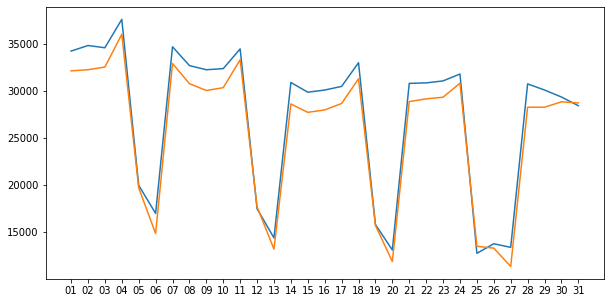

In [251]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font = fm.FontProperties(fname='/mnt/c/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font', family=font)

x = df['날짜']
y1 = df['승차']
y2 = df['하차']

plt.figure(figsize = (10, 5))
plt.plot(x, y1)
plt.plot(x, y2)
# plt.legend(['승차인원', '하차인원'])
plt.show()

# 호선별 승하차 인원

In [252]:
start = 20201201
end = 20201231

df = pd.DataFrame()

for date in range(start, end+1):
    date = str(date)
    tmp = station_count(date)
#     tmp = tmp[(tmp['호선']=='1호선') & (tmp['역명']==stat)]
    df = pd.concat([df, tmp], ignore_index=True)
    
display(df.head())

,날짜,호선,역명,승차,하차
0,01,1호선,서울역,34223,32123
1,01,1호선,동묘앞,7174,7260
2,01,1호선,시청,19416,19293
3,01,1호선,종각,30900,30029
4,01,1호선,종로3가,21112,19187


In [254]:
df.groupby('호선').sum()

,승차,하차
호선,,
1호선,4524627,4401813
2호선,27349999,27525740
3호선,10370096,10342567
4호선,9996651,10027533
5호선,12666401,12607021
6호선,6689737,6586330
7호선,14754524,14582160
8호선,3993278,4021631
9호선,5374165,5426681
